## Student name: Vangari Prashanth
## Assignment: Clustering

### Part 1: Data Wrangling (60 pts)
6 pts for each subtask except for the first one.

In [1348]:
"""
Import pandas library
Read the data stored in your local machine https://www.kaggle.com/datasets/thedevastator/analyzing-credit-card-spending-habits-in-india
Save data to a variable named df
Show it's information such as column titles, types of the columns
"""


'''
Read the "Credit card transactions - India - Simple.csv" file into a DataFrame object after importing the pandas library.
The DataFrame calls the {.info()} method. This method provides information about the DataFrame, such as the index dtype and column dtypes, and is used to print a succinct summary of the DataFrame.
'''
import pandas as pd
df = pd.read_csv("Credit card transactions - India - Simple.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [1349]:
# Remove column "index" from df

'''
To make changes to the df dataframe, remove the 'index' column.
The first five rows show the first five rows of the updated DataFrame,
'''
df = df.drop(['index'], axis=1)
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [1350]:
'''
Turn all columns to lowercase
Remove the name of country India from city. For instance, "Delhi, India" -> "Delhi"
'''

'''
The rename(columns=str.lower) method is used to convert all columns to lowercase. The column names of `tmp_df} are then copied from `df} to `tmp_df}.
The content of those columns is then changed to lowercase. Columns of type "object" are usually composed of string data.
'''

df = df.rename(columns=str.lower)
df["city"] = df["city"].str.replace(", India", "")
df.head()

,city,date,card type,exp type,gender,amount
0,Delhi,29-Oct-14,Gold,Bills,F,82475
1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555
2,Bengaluru,27-Aug-14,Silver,Bills,F,101738
3,Greater Mumbai,12-Apr-14,Signature,Bills,F,123424
4,Bengaluru,5-May-15,Gold,Bills,F,171574


In [1351]:
# Convert column date to datetype

'''
the code transforms the 'date' column of the DataFrame df into datetime objects.
Using the .head() method, it shows the first five rows of df.
'''

df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   city       26052 non-null  object        
 1   date       26052 non-null  datetime64[ns]
 2   card type  26052 non-null  object        
 3   exp type   26052 non-null  object        
 4   gender     26052 non-null  object        
 5   amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.2+ MB


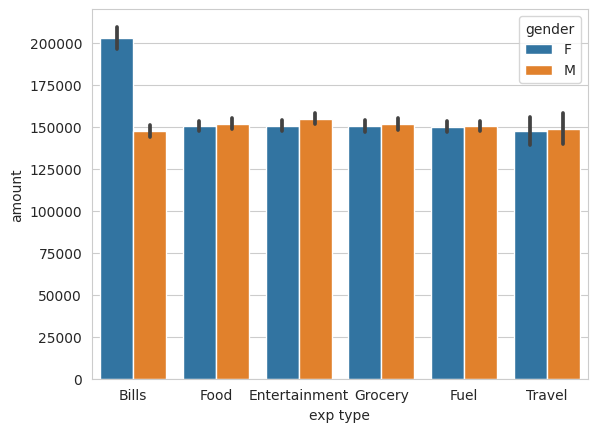

In [1352]:
'''
Visualize amount spent on each exp type, the color channel is on gender
'''
'''
The Seaborn and Matplotlib libraries are used. Using the 'exp type' column as the x-axis, 'amount' as the y-axis, and 'gender' to distinguish the data with color (hue),
Data from the DataFrame df served as the basis for the plot. The generated bar plot, which graphically depicts the relationship between expenditure type, amount, and gender within the dataset is displayed using show function.
'''



import matplotlib.pyplot as plt
import seaborn as seaborn
seaborn.barplot(x='exp type', y='amount', hue='gender', data=df)
plt.show()

In [1353]:
# Write your code to answer which cities have the most spending and least spending on average
a_spnd = df.groupby('city')['amount'].mean().sort_values()
l_spnd = a_spnd.index[0]
h_spnd = a_spnd.index[-1]
print(f"{l_spnd}")


Bahraich


In [1354]:
# Write your code to answer which cities have the least spending on average
print(f"{h_spnd}")

Thodupuzha


In [1355]:
# Write your code to answer the sum of amounts by all card types on Fuel, gender = female from beginning until 2014-05-05
print(df.loc[(df['exp type']=='Fuel') & (df['gender']=='F') & (df['date']<='2014-05-05'), 'amount'].sum())

138077354


In [1356]:
'''
Drop column date
Count the occurrences of each city, convert them into percentage in descending order, and show only those  with counts > 0.08%
'''
df = df.drop(columns='date')
c_c = df['city'].value_counts(normalize=True)
f_c = c_c[c_c > 0.0008]
print(f_c.sort_values(ascending=False))

Bengaluru         0.136343
Greater Mumbai    0.134078
Ahmedabad         0.134001
Delhi             0.133656
Hyderabad         0.030094
Chennai           0.029710
Kolkata           0.029671
Kanpur            0.029326
Lucknow           0.029134
Jaipur            0.028865
Surat             0.028750
Pune              0.028673
Name: city, dtype: float64


In [1357]:
'''
Change the name of cities of which counts are fewer than or equal to 0.0008 to "Other"
Show the city's value counts again to verify that
'''
c_c = df['city'].value_counts(normalize=True)
df.loc[df['city'].isin(c_c[c_c <= 0.0008].index), "city"] = "Other"
print(df['city'].value_counts(normalize=True))

Other             0.227698
Bengaluru         0.136343
Greater Mumbai    0.134078
Ahmedabad         0.134001
Delhi             0.133656
Hyderabad         0.030094
Chennai           0.029710
Kolkata           0.029671
Kanpur            0.029326
Lucknow           0.029134
Jaipur            0.028865
Surat             0.028750
Pune              0.028673
Name: city, dtype: float64


In [1358]:
'''
Encode the categorical columns to numeric. There are two types of encoding: ordinal and one-hot. Explain why you choose the encoding technique to the column(s) and implement it. Show some rows of df after encoding. There will be no printed console in this subtask
Reference (you may need incognito mode to browse the pages):
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
    https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79
    https://stackoverflow.com/questions/56502864/using-ordinalencoder-to-transform-categorical-values
    https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
    https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
'''


from sklearn.preprocessing import OrdinalEncoder
df = pd.get_dummies(df, columns=['city','exp type', 'gender'],drop_first=True)
c_mpping = {'Platinum': 3, 'Gold': 2, 'Silver': 1, 'Signature':0}
df['card type'] = df['card type'].map(c_mpping)
df.head(3)

,card type,amount,city_Bengaluru,city_Chennai,city_Delhi,city_Greater Mumbai,city_Hyderabad,city_Jaipur,city_Kanpur,city_Kolkata,city_Lucknow,city_Other,city_Pune,city_Surat,exp type_Entertainment,exp type_Food,exp type_Fuel,exp type_Grocery,exp type_Travel,gender_M
0,2,82475,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,32555,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,101738,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1359]:
'''
Here, both One Hot encoding and Ordinal encoding is used.
Columns such as city, experience type and gender has no natural order. Therefore, I used One hot encoding for them.
Whereas, the card type has order such as signature card type is very basic level and then silver, gold and the highest is platinum. Clearly, there is an order in the card types so ordinal encoding is used.
Amount column is already in numerical type we need not do any type of encoding.

'''

'\nHere, both One Hot encoding and Ordinal encoding is used. \nColumns such as city, experience type and gender has no natural order. Therefore, I used One hot encoding for them. \nWhereas, the card type has order such as signature card type is very basic level and then silver, gold and the highest is platinum. Clearly, there is an order in the card types so ordinal encoding is used. \nAmount column is already in numerical type we need not do any type of encoding.\n\n'

### Part 2: Clustering (40 pts)
10 pts for each subtask

In [1360]:
# Using sklearn library to split df into df_seen and df_unseen
from sklearn.model_selection import train_test_split

df_seen, df_unseen = train_test_split(df, test_size=0.2, random_state=50)


In [1361]:
'''
Use KMeans method from sklearn to
    Fit df_seen
    Show the first five labels of df_unseen after prediction
'''
from sklearn.cluster import KMeans
import time

t1 =time.time()
kmeans = KMeans(n_clusters=4, random_state=50)
kmeans.fit(df_seen)
pred = kmeans.predict(df_unseen)
t2=time.time()
print(pred[:5])
print("The time taken by Kmeans to execute is:",t2-t1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 3 0 3]
The time taken by Kmeans to execute is: 1.2688488960266113


Repeat the above task using KMeans++ from sklearn, any difference in prediction? Why?

In [1362]:
from sklearn.cluster import KMeans

t1 = time.time()
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=50)
kmeans.fit(df_seen)

pred = kmeans.predict(df_unseen)
t2= time.time()
print(pred[:5])
print("The time taken by the Kmeans++ is:",t2-t1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 3 0 3]
The time taken by the Kmeans++ is: 1.1336758136749268


In [1363]:
'''
No. The output I got from using Kmeans and Kmeans++ is same.
However, there is a difference in the time to executing Kmeans and Kmeans++.
Kmeans++ is very fast than the Kmeans becuase Kmeans++ uses weighted probability distribution to initialize the centroid values.
But Kmeans initializes the values randomly.
'''

'\nNo. The output I got from using Kmeans and Kmeans++ is same. \nHowever, there is a difference in the time to executing Kmeans and Kmeans++.\nKmeans++ is very fast than the Kmeans becuase Kmeans++ uses weighted probability distribution to initialize the centroid values. \nBut Kmeans initializes the values randomly.\n'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

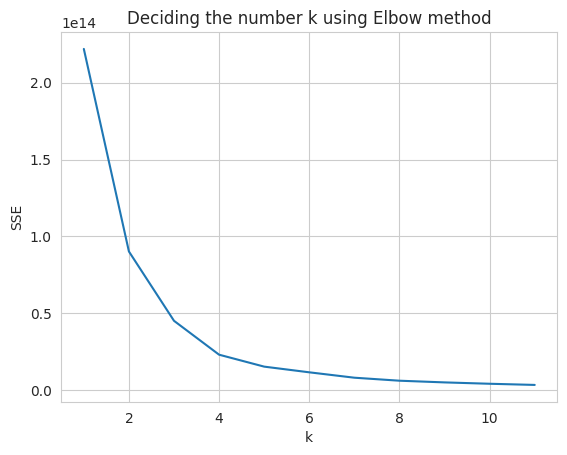

In [1364]:
'''
The code performs the Elbow method for KMeans clustering on a dataset `df_seen`.
It loops over a range of (1 to 12) and for each number, it initializes a KMeans clusterer with a set random state.
The inertia for each KMeans fit is stored in the list re.
A line plot drawn using Seaborn to visualize the inertia values across different numbers of clusters (k).
'''


import matplotlib.pyplot as plt
import numpy as np
import seaborn as seaborn

re = []
for no_of_clusters in range(1,12):
	km = KMeans(n_clusters=no_of_clusters, random_state=2)
	km.fit(df_seen)
	re.append(km.inertia_)

graph=seaborn.lineplot(x=range(1,12), y=re)

graph.set(xlabel ="k",
	ylabel = "SSE",
	title ='Deciding the number k using Elbow method')

plt.show()

What should be the best number of clusters? Why? Is there a way to find it scientifically?

In [1365]:
'''
Based on the Elbow method, the best number of clustes are 4.
We used Elbow method to identify the value of k. We can see in the graph after the k=4 the graph did change much.
But from k=1 to k=4 there is a sudden drop in the SSE. After 4 there is a slow change in the values.
Thus the value k=4 acts as an elbow.
Elbow method is basically a method which plots the graph between the values of k and SSE. By observing the graph, we can decide the value of k.


There is NO change in the predicted output between kmeans and Kmeans++.
'''

'\nBased on the Elbow method, the best number of clustes are 4. \nWe used Elbow method to identify the value of k. We can see in the graph after the k=4 the graph did change much. \nBut from k=1 to k=4 there is a sudden drop in the SSE. After 4 there is a slow change in the values. \nThus the value k=4 acts as an elbow.  \nElbow method is basically a method which plots the graph between the values of k and SSE. By observing the graph, we can decide the value of k.\n\n\nThere is NO change in the predicted output between kmeans and Kmeans++.\n'